### CNN with Keras
- CNN created with Keras API and TensorFlow backend
- achieves 99% accuracy in just 10 epochs

#### Architecture
input -> conv (5 x 5 x 32) -> max pool (2 x 2) -> conv (5 x 5 x 64) -> max pool (2 x 2) -> dense (1024) -> dense (10) -> Softmax

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28

In [3]:
# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.dtype

dtype('uint8')

In [5]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [6]:
# data values are in range [0, 255]
# convert to floats between [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
y_train[0]

5

In [9]:
# convert labels to one hot encoding
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# build model
model = Sequential()
# conv: 28 x 28 x 1 --> 24 x 24 x 32
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
# max pool: 24 x 24 x 32 --> 12 x 12 x 32
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# conv: 12 x 12 x 32 --> 8 x 8 x 64
model.add(Conv2D(64, (5, 5), activation='relu'))
# max pool: 8 x 8 x 64 --> 4 x 4 x 64
model.add(MaxPooling2D(pool_size=(2, 2))) # stride defaults to the pool_size for maxpooling
# flatten: 4 x 4 x 64 --> 1 x 1024
model.add(Flatten())
# dense: 1 x 1024 --> 1 x 1000
model.add(Dense(1000, activation='relu'))
# dense: 1 x 1000 --> 1 x 10
model.add(Dense(num_classes, activation='softmax'))

In [12]:
# compiling model defines loss, optimizer, and metrics
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [13]:
# helper class to keep track of accuracy
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

In [15]:
# fit model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 576us/step - loss: 0.1490 - acc: 0.9538 - val_loss: 0.0436 - val_acc: 0.9859
Epoch 2/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0417 - acc: 0.9874 - val_loss: 0.0337 - val_acc: 0.9890
Epoch 3/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.0267 - acc: 0.9918 - val_loss: 0.0368 - val_acc: 0.9875
Epoch 4/10
60000/60000 [==============================] - 34s 565us/step - loss: 0.0205 - acc: 0.9932 - val_loss: 0.0243 - val_acc: 0.9925
Epoch 5/10
60000/60000 [==============================] - 34s 563us/step - loss: 0.0156 - acc: 0.9953 - val_loss: 0.0292 - val_acc: 0.9906
Epoch 6/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0131 - acc: 0.9960 - val_loss: 0.0331 - val_acc: 0.9907
Epoch 7/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0100 - acc: 0.9968 - val_loss: 0.

Test loss: 0.0328290082796972
Test accuracy: 0.991


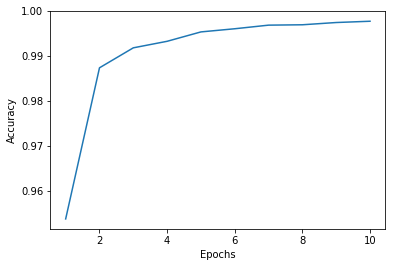

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()